Final Project Tutorial

In [58]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

importing necessary libraries and functions

In [59]:
image = fits.getdata("image.fits")

store image.fits in array

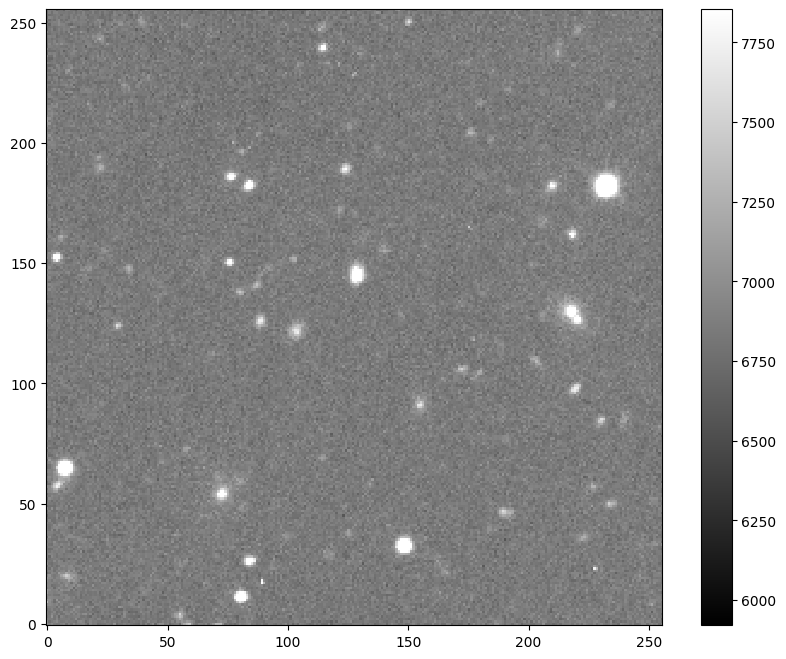

In [60]:
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('turtorialImage1.png')
plt.show()

save and display png

In [61]:
bkg = sep.Background(image)

compute and store background

In [62]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


global mean and noise of background

In [63]:
bkg_image = bkg.back()

retrieve background as 2darray

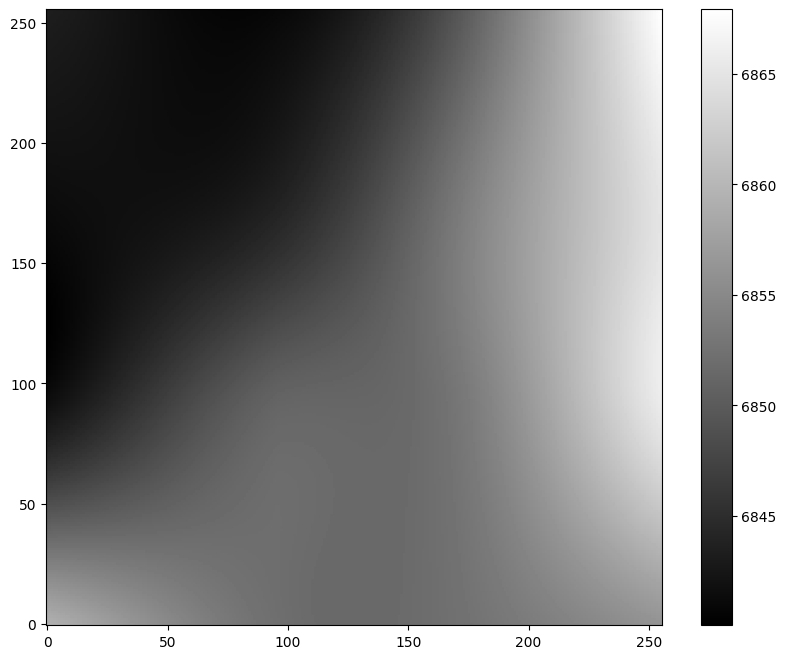

In [64]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('TutorialImage2.png')
plt.show()

save and display background png

In [65]:
bkg_rms = bkg.rms()

compute root mean square and store

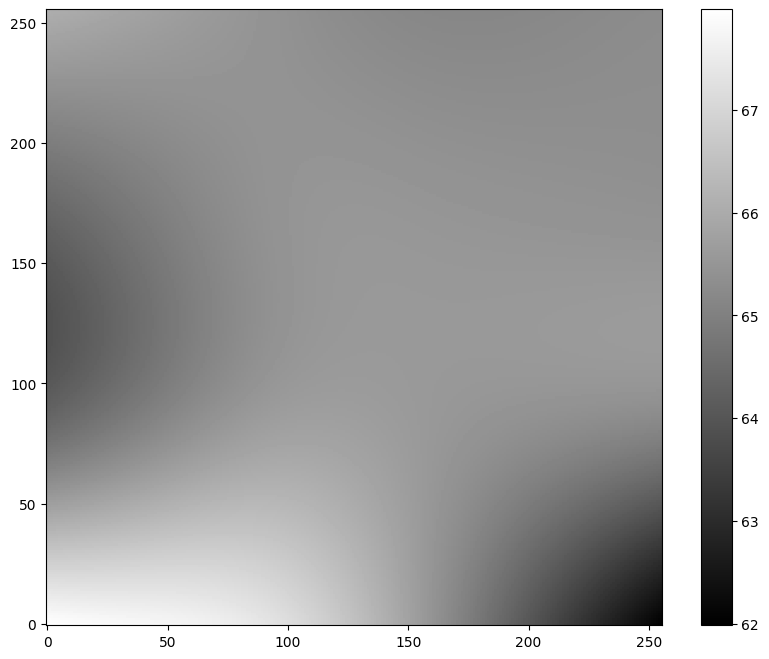

In [66]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('TutorialImage3.png')
plt.show()

save and display background noise png

In [67]:
image_sub = image - bkg

subtract background

In [68]:
objects = sep.extract(image_sub, 1.5, err=bkg.globalrms)

detect objects

In [69]:
len(objects)

69

how many objects

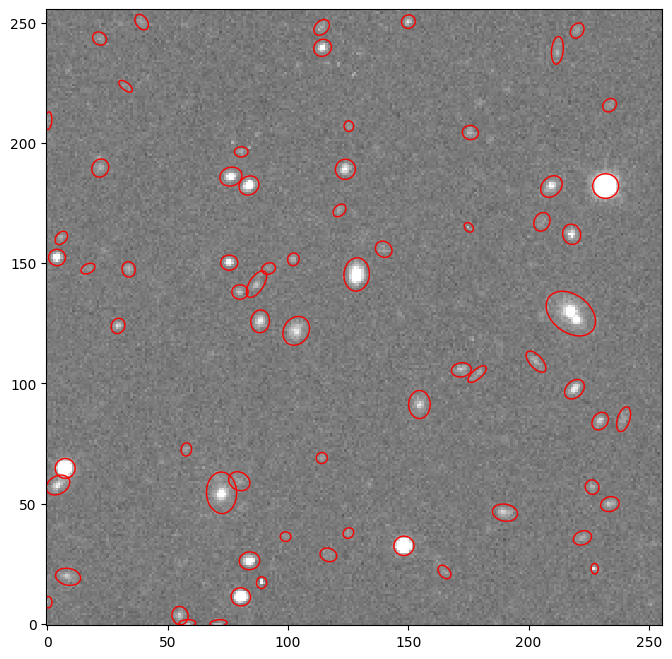

In [70]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(image_sub), np.std(image_sub)
im = ax.imshow(image_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('TutorialImage4.png')
plt.show()

plot subtracted background and circle objects

In [71]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

get fields

In [73]:
flux, fluxerr, flag = sep.sum_circle(image_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

aperture photometry

In [74]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


first 10 results